In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('car data.csv')

In [32]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
df.shape

(301, 9)

In [34]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [35]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [36]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Fuel_Type.unique())
print(df.Owner.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [37]:
#check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [39]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [40]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [41]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
final_dataset['Current_Year'] = 2021

In [43]:
final_dataset['no_year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [44]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


<AxesSubplot:>

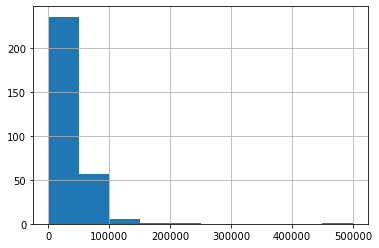

In [45]:
final_dataset['Kms_Driven'].hist()
#highly skewed distribution -- may be good to transform to log

In [46]:
final_dataset['log_kms_driven'] = np.log(final_dataset['Kms_Driven'])
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year,log_kms_driven
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7,10.203592
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8,10.668955
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4,8.839277
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10,8.556414
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7,10.656082


In [47]:
final_dataset.drop(columns=['Year','Current_Year','Kms_Driven'], axis=1, inplace=True)

In [48]:
final_dataset.head()

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,no_year,log_kms_driven
0,3.35,5.59,Petrol,Dealer,Manual,0,7,10.203592
1,4.75,9.54,Diesel,Dealer,Manual,0,8,10.668955
2,7.25,9.85,Petrol,Dealer,Manual,0,4,8.839277
3,2.85,4.15,Petrol,Dealer,Manual,0,10,8.556414
4,4.60,6.87,Diesel,Dealer,Manual,0,7,10.656082


In [49]:
#convert categorical data to numerical data
#onehot encoding
final_dataset = pd.get_dummies(final_dataset, drop_first=True)
#used drop_first to drop one of the dummy variables. so we have 2 variables instead of 3 for 3 categorical

In [50]:
final_dataset.head()

,Selling_Price,Present_Price,Owner,no_year,log_kms_driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,0,7,10.203592,0,1,0,1
1,4.75,9.54,0,8,10.668955,1,0,0,1
2,7.25,9.85,0,4,8.839277,0,1,0,1
3,2.85,4.15,0,10,8.556414,0,1,0,1
4,4.60,6.87,0,7,10.656082,1,0,0,1


In [51]:
#correlation
final_dataset.corr()

,Selling_Price,Present_Price,Owner,no_year,log_kms_driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,-0.088344,-0.236141,0.125193,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.008057,0.047584,0.296159,0.473306,-0.465244,-0.512030,-0.348715
Owner,-0.088344,0.008057,1.000000,0.182104,0.074260,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.182104,1.000000,0.545249,-0.064315,0.059959,0.039896,-0.000394
log_kms_driven,0.125193,0.296159,0.074260,0.545249,1.000000,0.260199,-0.265640,-0.321632,-0.019486
Fuel_Type_Diesel,0.552339,0.473306,-0.053469,-0.064315,0.260199,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,0.055687,0.059959,-0.265640,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,0.124269,0.039896,-0.321632,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.050316,-0.000394,-0.019486,-0.098643,0.091013,0.063240,1.000000


In [52]:
import seaborn as sns

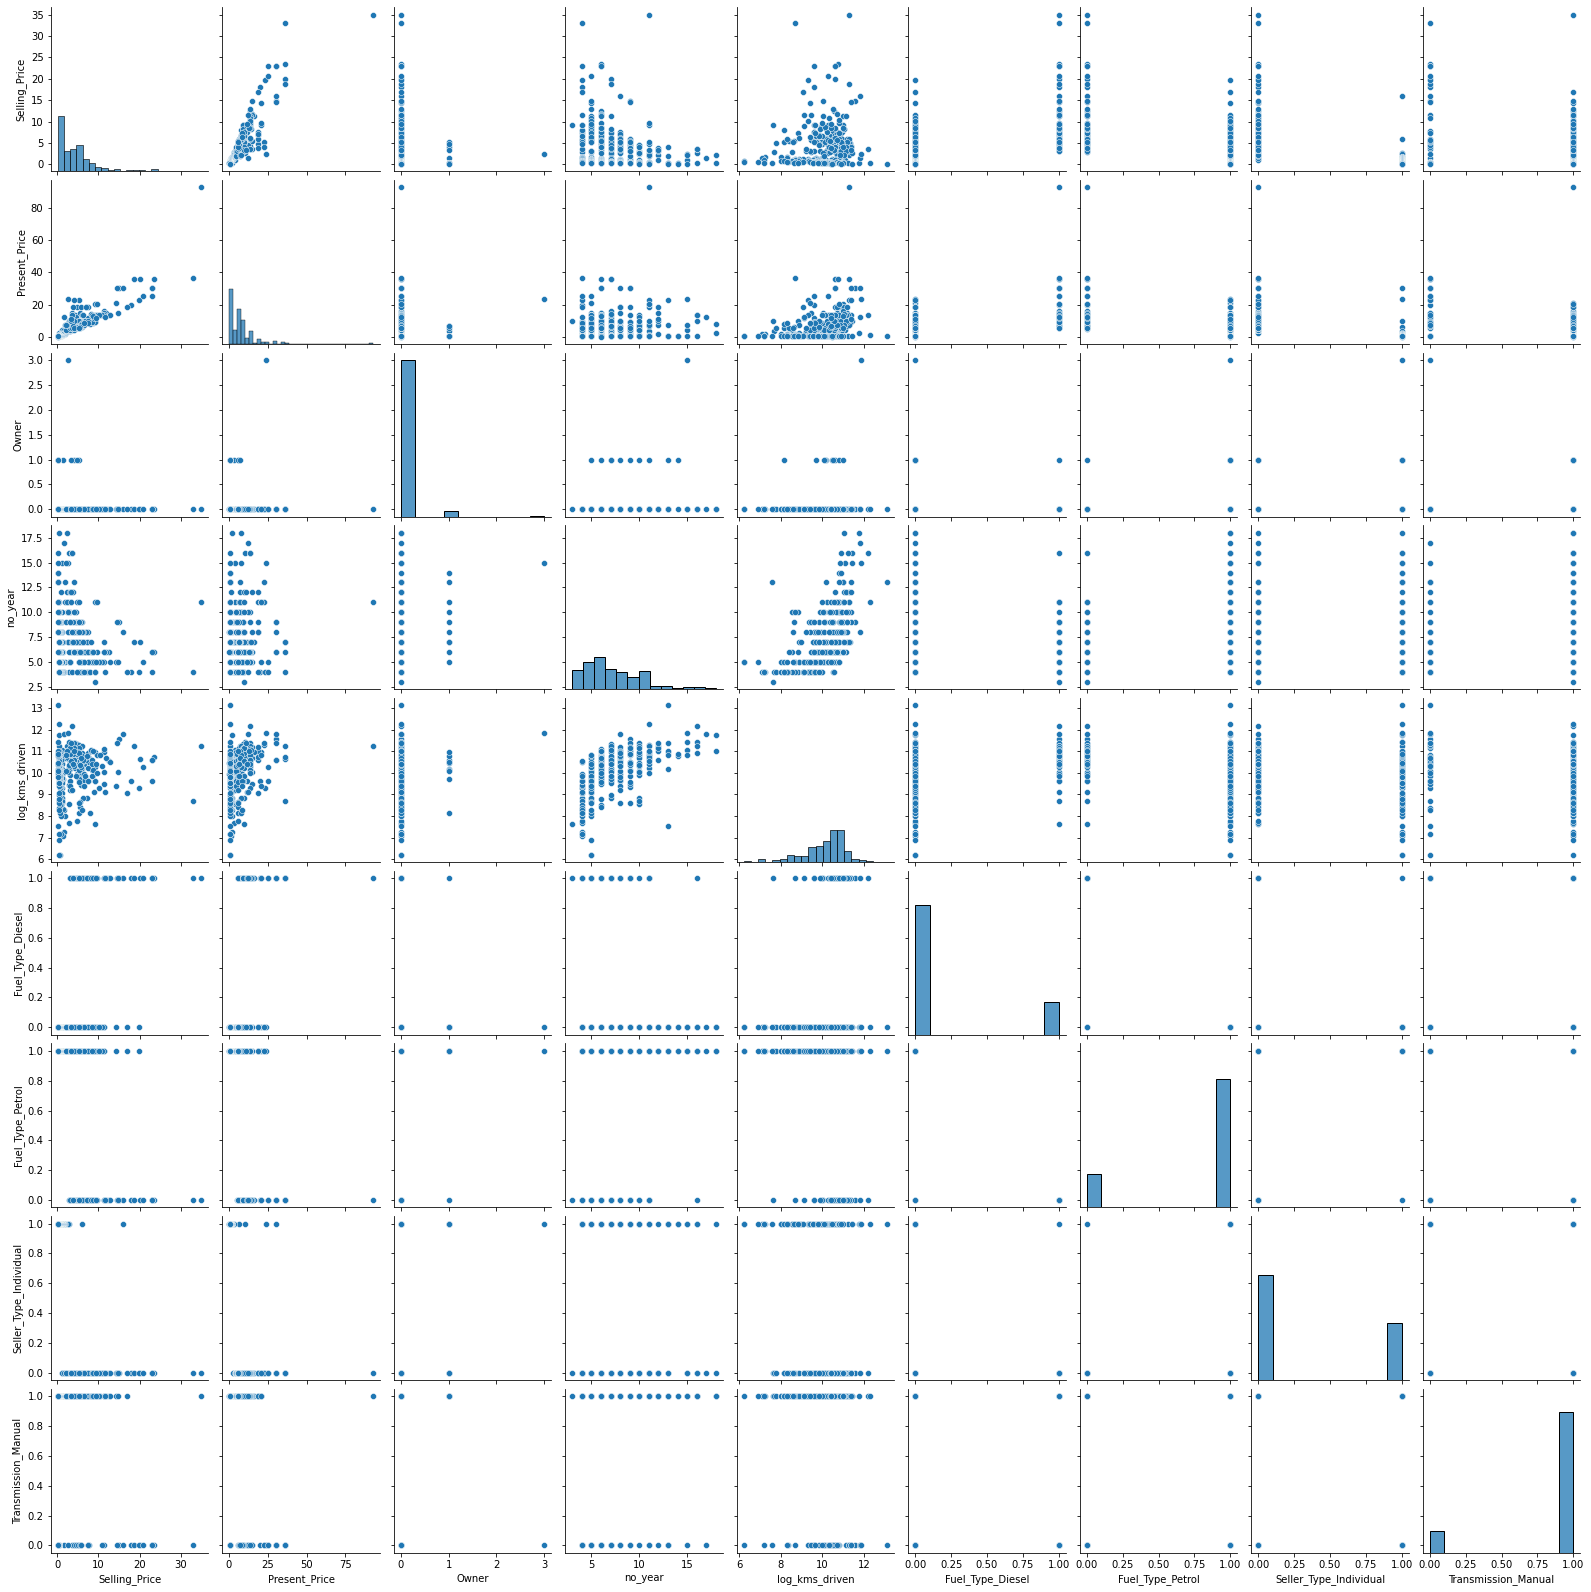

In [53]:
sns.pairplot(final_dataset)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

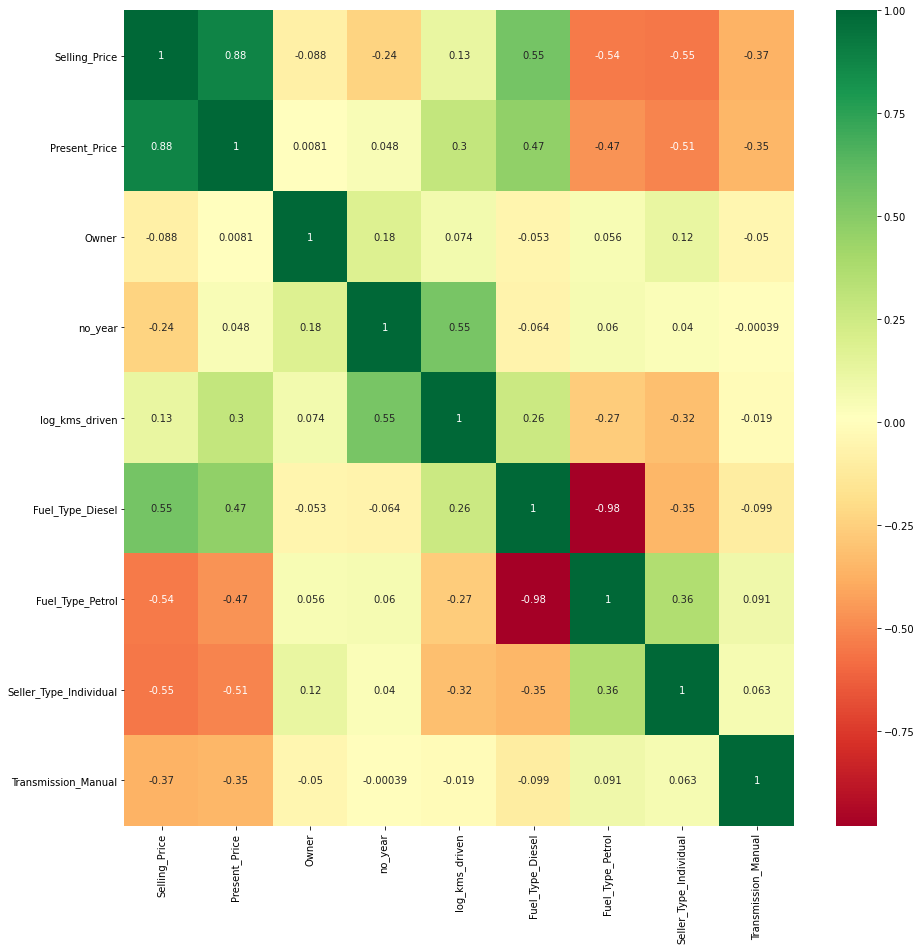

In [55]:
#create a heatmap 
corrmat=final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [56]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Owner', 'no_year', 'log_kms_driven',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [57]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [58]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [59]:
X.head()

,Present_Price,Owner,no_year,log_kms_driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,0,7,10.203592,0,1,0,1
1,9.54,0,8,10.668955,1,0,0,1
2,9.85,0,4,8.839277,0,1,0,1
3,4.15,0,10,8.556414,0,1,0,1
4,6.87,0,7,10.656082,1,0,0,1


In [60]:
### Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [61]:
print(model.feature_importances_)

[0.38401033 0.00047028 0.07195445 0.0466576  0.22203505 0.01608726
 0.1250976  0.13368743]


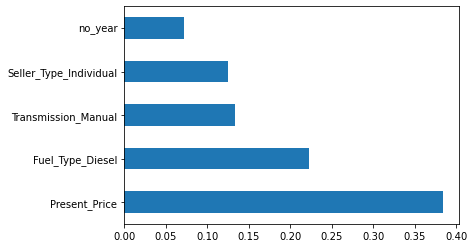

In [62]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [66]:
from sklearn.ensemble import RandomForestRegressor


In [67]:
### Hyperparameter tuning
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [68]:
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10, 15,100]
min_samples_leaf = [1,2,5,10]

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
               'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [71]:
rf = RandomForestRegressor()

In [72]:
rf_random = RandomizedSearchCV(estimator =rf, param_distributions=random_grid, 
                               scoring='neg_mean_squared_error',n_iter=10, 
                               cv=5, verbose=2,random_state=42, n_jobs=1)

In [74]:
rf_random_result = rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [75]:
print("Best: %f using %s" %(rf_random_result.best_score_, rf_random_result.best_params_))

Best: -3.877792 using {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [78]:
#final model using the best params
rf_random = RandomForestRegressor(**rf_random_result.best_params_)
rf_random.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [79]:
predictions=rf_random.predict(X_test)

In [80]:
predictions

array([ 1.19702,  5.3846 ,  2.82284,  4.43815,  0.88093,  0.32978,
        2.30611,  3.41235, 10.6942 ,  6.58932,  4.47966,  5.95857,
        2.78415,  4.23415,  6.19702,  6.40285,  4.31054,  4.29727,
        4.96883,  7.3871 ,  6.01805,  4.55625,  6.07734,  5.7766 ,
        3.09504, 20.75263,  6.24382,  4.5575 ,  8.77355, 11.70082,
        4.49185,  0.35982,  2.66127, 15.47199,  7.34025,  0.56541,
        5.76126,  6.62991,  5.26804,  0.45849,  1.04436, 11.88648,
        0.30731,  3.69534,  4.4029 ,  2.7301 ,  2.67292,  0.76771,
        1.0884 ,  0.69472,  7.89402,  0.77263,  5.60909,  0.44582,
        6.8391 ,  0.61009,  0.54839,  0.66717,  8.00952,  3.11902,
        4.46305])

C:\Users\gkuma\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

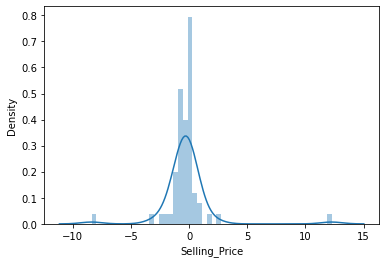

In [81]:
sns.distplot(y_test-predictions)

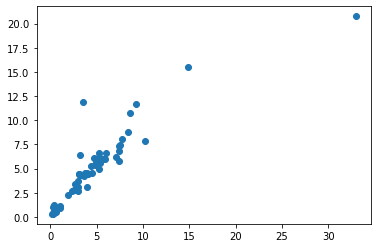

In [82]:
plt.scatter(y_test, predictions)

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

4.411608964158991

In [83]:
import pickle
file = open('random_forest_regression_model.pkl','wb')

#dump info to that file
pickle.dump(rf_random, file)
